Dimensionality Reduction

Dataset: MNIST

Tasks: reduce the dataset’s dimensionality (PCA, t-SNE, LLE, MDS, LDA), then apply classification
(Logistic, SVM, Random Forest)

Hints: sklearn.decomposition, PCA(), IncrementalPCA(), KernelPCA()

Import data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing_data = pd.read_csv('housing.csv')

print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Projection using PCA

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

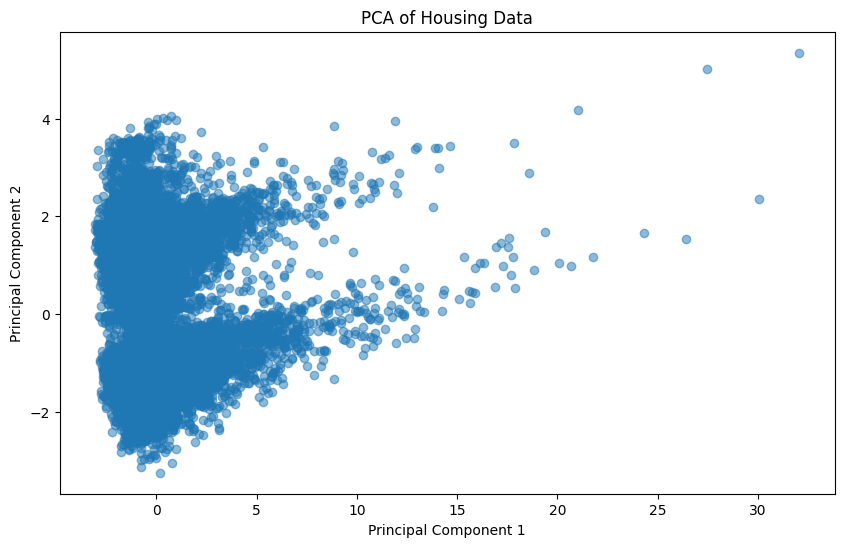

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Observe the dataset
print(housing_data.describe())

# Standardize the data
features = housing_data.drop('ocean_proximity', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Filter out the rows with NA values
scaled_features = scaled_features[~np.isnan(scaled_features).any(axis=1)]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Data')
plt.show()

t-SNE

c:\Users\hungnguy\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hungnguy\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\hungnguy\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\hungnguy\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\hungnguy\AppData\Local\Programs\Python\Python3

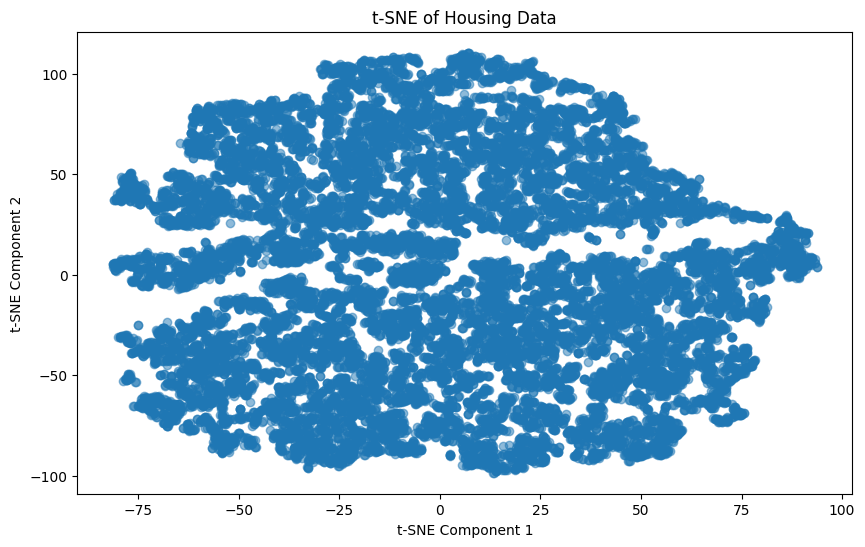

In [3]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plot the t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE Component 1'], tsne_df['t-SNE Component 2'], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Housing Data')
plt.show()

LLE

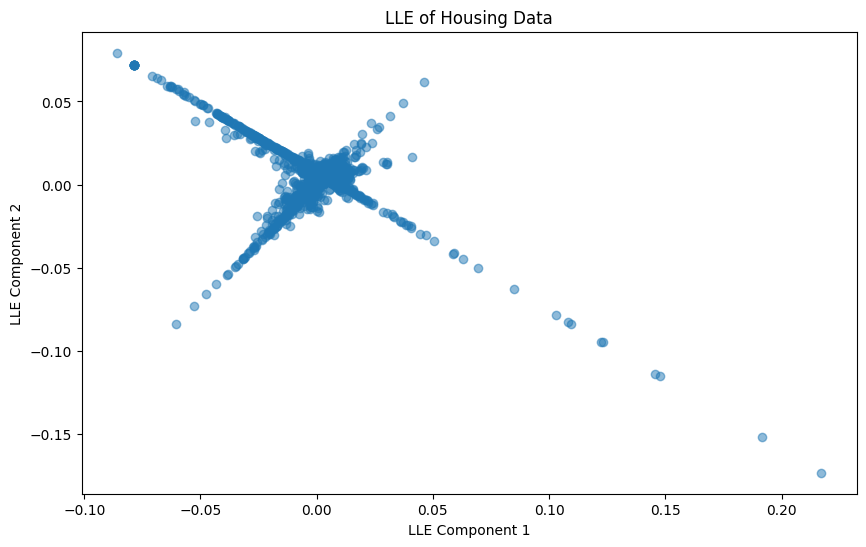

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_components = lle.fit_transform(scaled_features)

# Create a DataFrame with the LLE components
lle_df = pd.DataFrame(data=lle_components, columns=['LLE Component 1', 'LLE Component 2'])

# Plot the LLE components
plt.figure(figsize=(10, 6))
plt.scatter(lle_df['LLE Component 1'], lle_df['LLE Component 2'], alpha=0.5)
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.title('LLE of Housing Data')
plt.show()

MDS

In [5]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(scaled_features)

# Create a DataFrame with the MDS components
mds_df = pd.DataFrame(data=mds_components, columns=['MDS Component 1', 'MDS Component 2'])

# Plot the MDS components
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['MDS Component 1'], mds_df['MDS Component 2'], alpha=0.5)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS of Housing Data')
plt.show()

KeyboardInterrupt: 